In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 
from scipy import stats

# Content & Acknowledgements
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

....Now with extra data including including property size, land size and council area, you may need to change your code!

### Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2: Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

_source:_ https://www.kaggle.com/anthonypino/melbourne-housing-market/home 

In [2]:
raw_df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
raw_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
raw_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
raw2_df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [6]:
raw2_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [7]:
raw_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
raw2_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [9]:
raw_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [10]:
raw2_df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [11]:
raw_df[['Landsize','Price']].dropna(how='any').corr()

,Landsize,Price
Landsize,1.000000,0.032748
Price,0.032748,1.000000


In [12]:
raw_df[['YearBuilt','Price']].dropna(how='any').corr()

,YearBuilt,Price
YearBuilt,1.000000,-0.333306
Price,-0.333306,1.000000


In [13]:
raw_df[['BuildingArea','Price']].dropna(how='any').corr()

,BuildingArea,Price
BuildingArea,1.000000,0.100754
Price,0.100754,1.000000


In [14]:
#Drop'BuildingArea','YearBuilt','Landsize'
housing_df = raw_df.drop(['BuildingArea','YearBuilt','Landsize'],1)

#Drop Remaining NA values 
housing_df.dropna(how='any',axis=0,inplace=True)

#Remove any duplicates with same address (since we are not accounting for time)
housing_df = housing_df.drop_duplicates(subset='Address',keep='first')

housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [15]:
#Review Unique values of each column  
for column in housing_df.columns: 
    print("Unique values of {} is: {}".format(column, 
                                            housing_df[column].unique()),"\n")


Unique values of Suburb is: ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' '

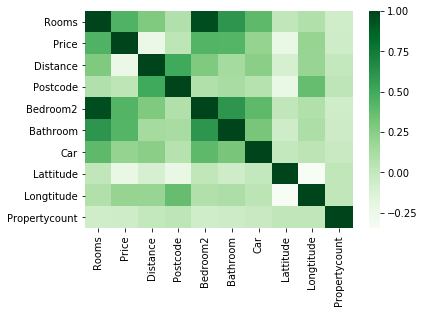

In [16]:
#Review correlation heatmat matrix for dataframe 
corr = housing_df.corr()

sns.heatmap(corr,cmap='Greens')

In [17]:
#Review correlation matrix for dataframe 
corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.446826,0.279809,0.083431,0.957644,0.608017,0.396683,0.021802,0.086577,-0.061655
Price,0.446826,1.000000,-0.232991,0.033722,0.431762,0.430987,0.201588,-0.214669,0.197809,-0.053844
Distance,0.279809,-0.232991,1.000000,0.504117,0.282938,0.139579,0.246157,-0.094516,0.192483,0.001903
Postcode,0.083431,0.033722,0.504117,1.000000,0.087040,0.123230,0.063657,-0.216302,0.368576,0.030119
Bedroom2,0.957644,0.431762,0.282938,0.087040,1.000000,0.605620,0.398328,0.021677,0.088951,-0.061750
Bathroom,0.608017,0.430987,0.139579,0.123230,0.605620,1.000000,0.306551,-0.044912,0.102039,-0.041883
Car,0.396683,0.201588,0.246157,0.063657,0.398328,0.306551,1.000000,0.002332,0.039413,-0.012796
Lattitude,0.021802,-0.214669,-0.094516,-0.216302,0.021677,-0.044912,0.002332,1.000000,-0.347672,0.021560
Longtitude,0.086577,0.197809,0.192483,0.368576,0.088951,0.102039,0.039413,-0.347672,1.000000,0.026053
Propertycount,-0.061655,-0.053844,0.001903,0.030119,-0.061750,-0.041883,-0.012796,0.021560,0.026053,1.000000


#### Add Variables 

- House size, based on number of rooms
- House pricing, based on neighborhood 
- House pricing, based on CityCouncil 
- Get dummies of Type variable 
- Get dummies of Method variable 
- Get dummies of Regionname variable 
- Get dummies from Date variable (focus on years) 

In [18]:
#House size, based on number of rooms 
housing_df['house_size'] = np.nan
housing_df.loc[housing_df.Rooms <=4,'house_size'] = 1
housing_df.loc[housing_df.Rooms >=10,'house_size'] = 3
housing_df.loc[housing_df.house_size.isna()==True,'house_size'] = 2

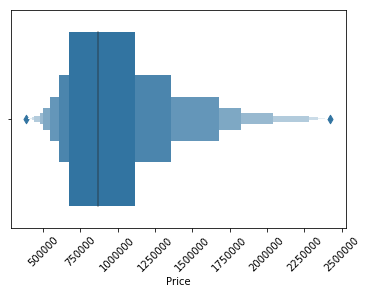

In [19]:
#Check pricing by suburb plot to ensure no outliers 
sns.boxenplot(housing_df.groupby('Suburb')['Price'].mean())
plt.xticks(rotation=45) 
plt.show()

In [20]:
#Create function that will help to create variables based off 
## 'Suburb' and 'Council Area' Variables 
def city_county_neigh_avg(x, y, z):
    x = x.copy()
    desc = x.groupby(y)[z].mean().describe()
    series = x.groupby(y)[z].mean()
    
    low_price = list(series[series<=desc.loc['25%']].index)
    med_price = list(series[(series>desc.loc['25%']) & (series<desc.loc['50%'])].index)
    high_price = list(series[(series>=desc.loc['50%'])&(series<desc.loc['75%'])].index)
    vhigh_price = list(series[series>=desc.loc['75%']].index)
    
    q = "{}_avg".format(y)
    
    x[q] = np.nan
    for i in x[y]:
        if i in low_price:
            x.loc[x[y]==i, q] = 1
        elif i in med_price:
            x.loc[x[y]==i, q] = 2
        elif i in high_price: 
            x.loc[x[y]==i, q] = 3
        else:
            x.loc[x[y]==i, q] = 4
            
    return x

In [21]:
housing_df = city_county_neigh_avg(housing_df,'CouncilArea','Price')

In [22]:
housing_df = city_county_neigh_avg(housing_df,'Suburb','Price')

In [23]:
# Create function to get dummies from variables 
def kbm_get_dummies(x, y):
    x = x.copy()
    for i in x[y].unique():
        x[i] = np.where((x[y]==i), 1, 0)
    return x     

In [24]:
housing_df = kbm_get_dummies(housing_df,'Type')

In [25]:
housing_df = kbm_get_dummies(housing_df,'Method')

In [26]:
housing_df = kbm_get_dummies(housing_df,'Regionname')

In [27]:
dummy_df = housing_df.copy()
lis = ['2016','2017','2018']
for i in lis:
    dummy_df[i] = np.where(housing_df.Date.str.contains(i),1,0)
    
housing_df = dummy_df.copy()    

In [28]:
housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Western Metropolitan,Southern Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,Eastern Victoria,Northern Victoria,Western Victoria,2016,2017,2018
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,0,0,0,0,0,0,0,1,0,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0,0,0,0,0,0,0,1,0,0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,0,0,0,0,0,0,0,1,0,0


# Feature Engineering 

- Review correlation of variables to Price 
- Run LASSO regression to see if there are variables that can be remove 
- Remove unneccesary variables 

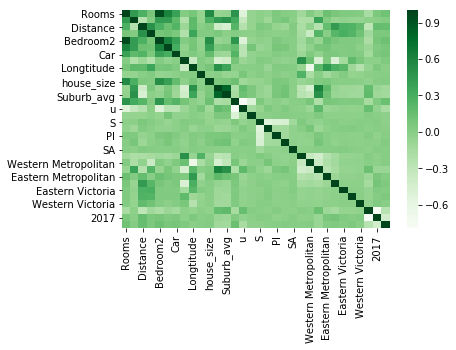

In [29]:
#Heatmap of dataframe correlation
corr = housing_df.corr()

sns.heatmap(corr, cmap='Greens')

In [30]:
#correlation matrix 
corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,...,Western Metropolitan,Southern Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,Eastern Victoria,Northern Victoria,Western Victoria,2016,2017,2018
Rooms,1.000000,0.446826,0.279809,0.083431,0.957644,0.608017,0.396683,0.021802,0.086577,-0.061655,...,0.032616,-0.066590,0.139009,0.070087,0.039819,0.038903,0.022412,-0.159380,0.067440,0.125662
Price,0.446826,1.000000,-0.232991,0.033722,0.431762,0.430987,0.201588,-0.214669,0.197809,-0.053844,...,-0.180969,0.381644,0.028234,-0.064242,-0.046708,-0.058843,-0.062545,-0.014529,-0.000109,0.021066
Distance,0.279809,-0.232991,1.000000,0.504117,0.282938,0.139579,0.246157,-0.094516,0.192483,0.001903,...,-0.042322,-0.237308,0.170213,0.434510,0.275528,0.260905,0.178804,-0.284433,0.164412,0.156593
Postcode,0.083431,0.033722,0.504117,1.000000,0.087040,0.123230,0.063657,-0.216302,0.368576,0.030119,...,-0.354467,0.242035,0.002540,0.230037,0.300376,0.249466,0.122398,-0.112720,0.064082,0.063708
Bedroom2,0.957644,0.431762,0.282938,0.087040,1.000000,0.605620,0.398328,0.021677,0.088951,-0.061750,...,0.028129,-0.069762,0.144029,0.072792,0.040730,0.039814,0.023197,-0.179019,0.082667,0.130523
Bathroom,0.608017,0.430987,0.139579,0.123230,0.605620,1.000000,0.306551,-0.044912,0.102039,-0.041883,...,-0.029386,0.075963,0.092516,0.028221,0.029974,0.036423,-0.011464,-0.090321,0.034962,0.076216
Car,0.396683,0.201588,0.246157,0.063657,0.398328,0.306551,1.000000,0.002332,0.039413,-0.012796,...,0.044716,-0.035329,0.058542,0.069796,0.029461,0.036055,0.022315,-0.128357,0.058841,0.094247
Lattitude,0.021802,-0.214669,-0.094516,-0.216302,0.021677,-0.044912,0.002332,1.000000,-0.347672,0.021560,...,0.145452,-0.453727,0.046593,-0.479318,-0.130809,0.190435,0.075610,-0.015706,-0.016955,0.048632
Longtitude,0.086577,0.197809,0.192483,0.368576,0.088951,0.102039,0.039413,-0.347672,1.000000,0.026053,...,-0.663294,0.213514,0.452282,0.288274,0.226994,-0.099388,-0.226444,-0.056442,0.053453,-0.000915
Propertycount,-0.061655,-0.053844,0.001903,0.030119,-0.061750,-0.041883,-0.012796,0.021560,0.026053,1.000000,...,-0.169896,0.003251,-0.118970,-0.030820,0.034852,-0.053954,-0.048331,-0.005884,0.000546,0.007625


In [31]:
from sklearn.linear_model import Lasso
from sklearn import preprocessing
#preprocess dataframe 

test_df = pd.DataFrame(preprocessing.scale(housing_df[housing_df.describe().columns]),
                  columns=housing_df.describe().columns)

In [32]:
test_df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,...,Western Metropolitan,Southern Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,Eastern Victoria,Northern Victoria,Western Victoria,2016,2017,2018
0,-1.124254,0.603748,-1.304307,-0.414174,-1.095706,-0.848723,-0.718254,0.079158,0.007982,-0.790751,...,-0.53134,-0.662638,-0.374994,-0.229446,-0.083281,-0.082671,-0.063713,1.481164,-1.149120,-0.365494
1,-1.124254,-0.076335,-1.304307,-0.414174,-1.095706,-0.848723,-1.724634,-0.010602,-0.033285,-0.790751,...,-0.53134,-0.662638,-0.374994,-0.229446,-0.083281,-0.082671,-0.063713,1.481164,-1.149120,-0.365494
2,-0.066223,0.580824,-1.304307,-0.414174,-0.049304,0.576844,-1.724634,-0.025742,-0.025032,-0.790751,...,-0.53134,-0.662638,-0.374994,-0.229446,-0.083281,-0.082671,-0.063713,-0.675145,0.870231,-0.365494
3,-0.066223,-0.359067,-1.304307,-0.414174,-0.049304,0.576844,-0.718254,0.108356,-0.004398,-0.790751,...,-0.53134,-0.662638,-0.374994,-0.229446,-0.083281,-0.082671,-0.063713,-0.675145,0.870231,-0.365494
4,0.991808,0.787142,-1.304307,-0.414174,-0.049304,-0.848723,0.288125,-0.003032,-0.027508,-0.790751,...,-0.53134,-0.662638,-0.374994,-0.229446,-0.083281,-0.082671,-0.063713,1.481164,-1.149120,-0.365494


In [33]:
#Split data into test v. train 
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
data = test_df.drop('Price',1)
target = housing_df['Price']


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [34]:
lass = Lasso()
fit = lass.fit(X_train, y_train)
coef = fit.coef_
lass.score(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6112457819512049

In [35]:
coef

array([ 142751.42580813, -207466.35645423,   22882.87615533,
         15749.33050499,  122921.10087016,   42961.48184866,
         -6573.28151743,  -26889.17078813,    4670.61198676,
          5881.15523507,   19686.9769952 ,  190351.09563849,
        199264.06268755,  -23534.02714114,   29427.41605259,
         22922.54044569,    4381.57527392,   -8341.97937346,
          2017.28581526,    -654.93110867,  -78700.47349892,
       -100024.43930423,   69840.92931293,  -39096.67001845,
         11681.11645183,   16979.12282325,    2290.05306284,
         -6865.23558557,  -45132.03767604,       0.        ,
          1603.43870747])

In [36]:
# remove '2017' and re-fit/score LASSO

#Split data into test v. train 
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
data = test_df.drop(['Price','2017'],1)
target = housing_df['Price']


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [37]:
lass = Lasso()
fit = lass.fit(X_train, y_train)
coef = fit.coef_
lass.score(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.611245781951205

In [38]:
coef

array([ 142751.42580733, -207466.35645428,   22882.87615533,
         15749.33050569,  122921.10087018,   42961.48184867,
         -6573.28151743,  -26889.17078811,    4670.61198677,
          5881.15523513,   19686.97699518,  190351.09563847,
        199264.0626876 ,  -23534.02714115,   29427.41605261,
         22922.54044569,    4381.57527391,   -8341.97937346,
          2017.28581526,    -654.93110867,  -78700.47349894,
       -100024.43930423,   69840.92931292,  -39096.67001845,
         11681.11645184,   16979.12282325,    2290.05306285,
         -6865.23558556,  -45132.03767603,    1603.43870747])

# Run Models to See if we can improve Accuracy 
- Ridge Regression 
- Random Forest 
- Gradient Boost 
- Ensemble Model 

In [39]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
#ridge regression  
rid = Ridge()

fit = rid.fit(X_train, y_train)
coef_rid = fit.coef_
rid.score(X_train, y_train)

0.6112457755119117

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(rid, X_train, y_train, cv=10)

array([0.61567803, 0.63316573, 0.66893554, 0.65360799, 0.5363349 ,
       0.60910601, 0.57714895, 0.60115759, 0.62260652, 0.59858764])

In [42]:
#Random Forest Regressor 
rfr = RandomForestRegressor()

fit = rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)

0.9568558784310395

In [43]:
cross_val_score(rfr, X_train, y_train, cv=10)

array([0.74288406, 0.73177642, 0.75930715, 0.75756682, 0.65270088,
       0.74879283, 0.70116702, 0.75440387, 0.73129433, 0.73531202])

In [44]:
#Gradient Boosting Regressor 
gbr = GradientBoostingRegressor()

fit = gbr.fit(X_train, y_train)
gbr.score(X_train, y_train)

0.7664057612255093

In [45]:
cross_val_score(gbr, X_train, y_train, cv=10)

array([0.74323654, 0.74248321, 0.78810065, 0.76554151, 0.65240587,
       0.75119057, 0.70788607, 0.74350687, 0.75002603, 0.72335548])

In [46]:
#Bagging Regressor using rfr 
br = BaggingRegressor(RandomForestRegressor())

fit = br.fit(X_train, y_train)
br.score(X_train, y_train)

0.9094958027090099

In [47]:
cross_val_score(br, X_train, y_train, cv=10)

array([0.7602908 , 0.76730981, 0.79568882, 0.79221553, 0.66380802,
       0.77152981, 0.72187338, 0.75998714, 0.77241541, 0.76909417])

In [48]:
#Ada Boosting Regressor 
ada = AdaBoostRegressor(RandomForestRegressor())
fit = ada.fit(X_train, y_train)
ada.score(X_train, y_train)

0.9920831678808241

In [49]:
cross_val_score(ada, X_train, y_train, cv=10)

array([0.76524779, 0.74406074, 0.79484604, 0.78316218, 0.65958113,
       0.7726012 , 0.7347436 , 0.77533664, 0.77680739, 0.76832761])

In [50]:
ada.score(X_test, y_test)

0.7746591738513481

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


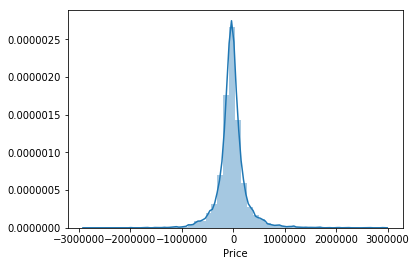

In [52]:
#Graph residuals 
y_pred = ada.predict(X_test)
residuals = y_test - y_pred 
sns.distplot(residuals)
plt.show()